# Cavity Temp Evolution

Instead of total heat content in cavity

Can we check if it matches melting heat transport?

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import cmocean as cm

from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors

Models: 
```
COCO   MITgcm-BAS          MITgcm-JPL  MOM6_SIGMA_ZSTAR  NEMO-CNRS      POP2x
FVCOM  MITgcm_BAS_Coupled  MOM6        MPAS-Ocean        NEMO-UKESM1is  ROMS-UTAS
```

In [2]:
## folder where the isomip-plus github repo is located
baserepo = '/g/data/x77/cy8964/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/scratch/x77/cy8964/ISOMIP+Data-new/'

# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)


# Ocean0 Vertical Transects through center of domain

And then take mean temp with x < 645 = index < 163


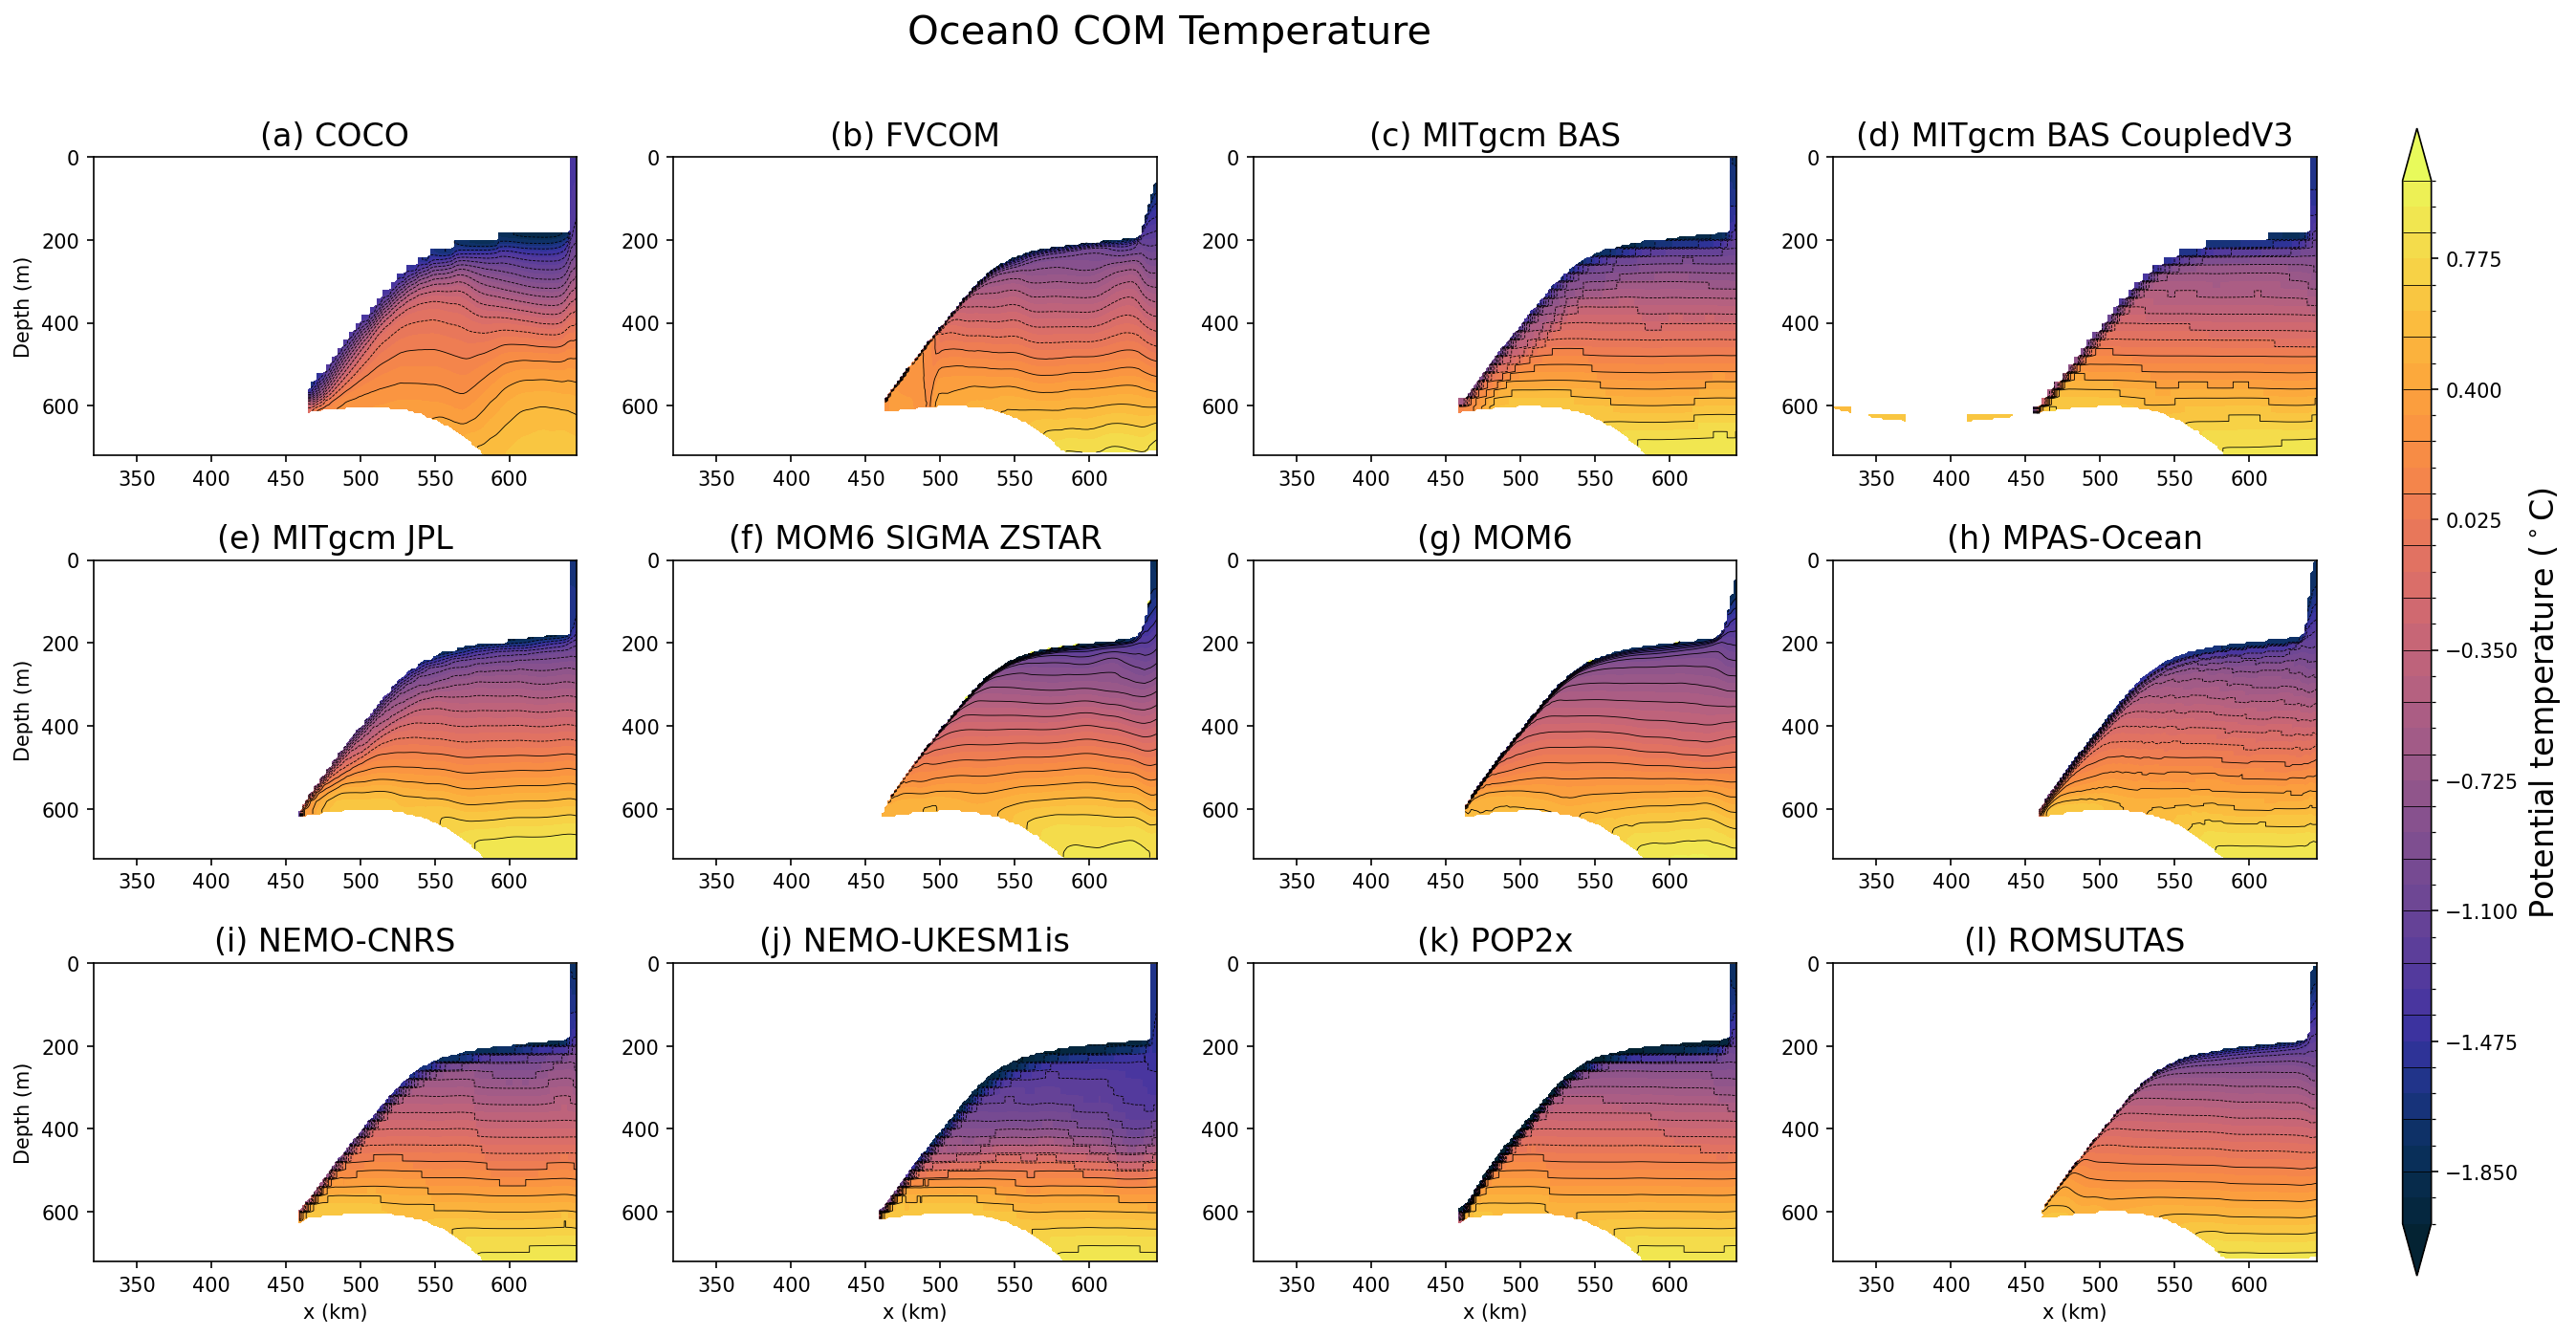

In [16]:
expt = Ocean0_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
time = 12
for i in np.arange(length):
    plt.subplot(3,nrows,i+1)
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    var = data.temperatureXZ.isel(nTime = np.arange(time-13,time)).mean('nTime')
    # last year of time
    var['nz'] = var.nz*5+2.5 # add depth (2.5,7.5 etc)
    var['nx'] = var.nx*2+321
    # mr<1e36 is to get rid of NaNs.
    c = (var.where(var <1e36)).isel(nx = np.arange(163)).plot.contourf(cmap = cm.cm.thermal, levels = np.linspace(-2,1,41),extend = 'both',add_colorbar = False)#, cbar_kwargs = {'label':'Overturning \n Streamfunction (Sv)'},extend = 'both')
    ls = (var.where(var <1e36)).isel(nx = np.arange(163)).plot.contour( levels = np.linspace(-2,1,21), colors = 'k', linewidths = 0.4)
    plt.title('('+alphabet[i]+') '+labels[i], fontsize = 16)
    if (i==0) or (i==4) or (i==8):
        plt.ylabel('Depth (m)')
    else:
        plt.ylabel('')
    if i>=8:
        plt.xlabel('x (km)')
    else:
        plt.xlabel('')
    plt.ylim(720,0)
    #plt.xlim(450,644)

cax = plt.axes([0.93,0.1,0.01,0.8])
cbar = plt.colorbar(c, cax = cax)
cbar.ax.set_ylabel(r'Potential temperature ($^\circ $C)', fontsize = 16)
cbar.add_lines(ls)
fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean0 COM Temperature', fontsize = 20);

In [65]:
print(var.nx[161])


<xarray.DataArray 'nx' ()>
array(643)
Coordinates:
    nx       int64 643


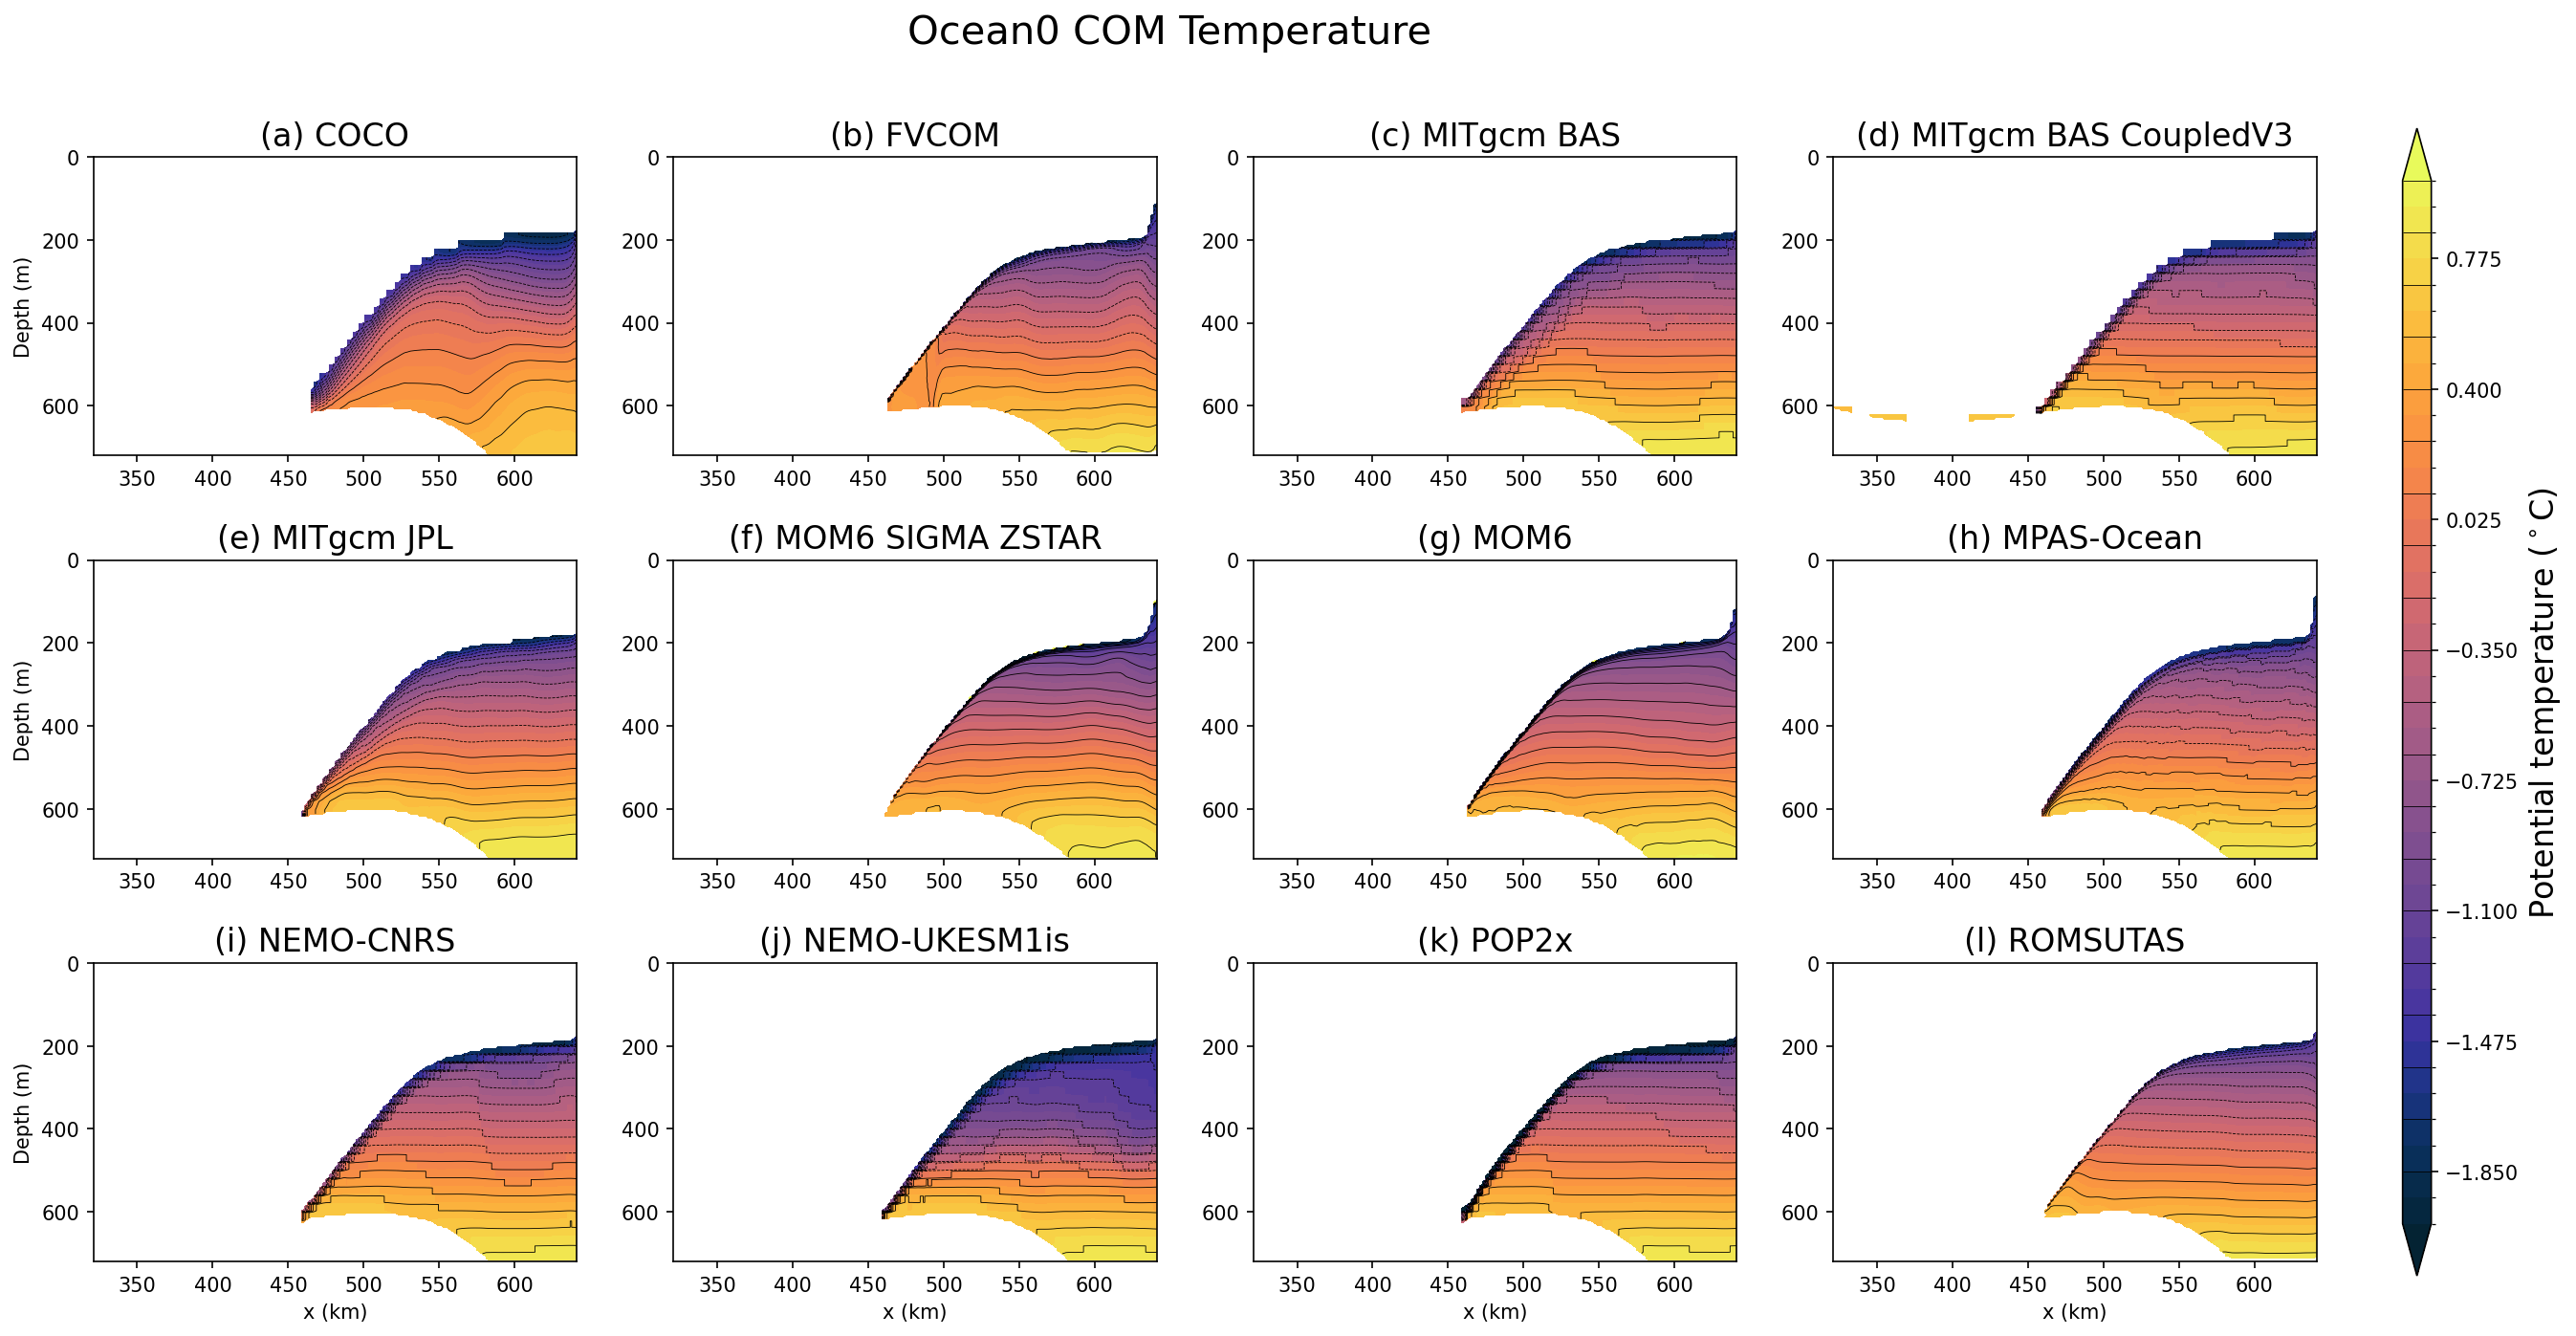

In [18]:
expt = Ocean0_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
time = 12
for i in np.arange(length):
    plt.subplot(3,nrows,i+1)
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    var = data.temperatureXZ.isel(nTime = np.arange(time-13,time)).mean('nTime')
    # last year of time
    var['nz'] = var.nz*5+2.5 # add depth (2.5,7.5 etc)
    var['nx'] = var.nx*2+321
    # mr<1e36 is to get rid of NaNs.
    c = (var.where(var <1e36)).isel(nx = np.arange(161)).plot.contourf(cmap = cm.cm.thermal, levels = np.linspace(-2,1,41),extend = 'both',add_colorbar = False)#, cbar_kwargs = {'label':'Overturning \n Streamfunction (Sv)'},extend = 'both')
    ls = (var.where(var <1e36)).isel(nx = np.arange(161)).plot.contour( levels = np.linspace(-2,1,21), colors = 'k', linewidths = 0.4)
    plt.title('('+alphabet[i]+') '+labels[i], fontsize = 16)
    if (i==0) or (i==4) or (i==8):
        plt.ylabel('Depth (m)')
    else:
        plt.ylabel('')
    if i>=8:
        plt.xlabel('x (km)')
    else:
        plt.xlabel('')
    plt.ylim(720,0)
    #plt.xlim(450,644)

cax = plt.axes([0.93,0.1,0.01,0.8])
cbar = plt.colorbar(c, cax = cax)
cbar.ax.set_ylabel(r'Potential temperature ($^\circ $C)', fontsize = 16)
cbar.add_lines(ls)
fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean0 COM Temperature', fontsize = 20);

COCO
FVCOM
MITgcm BAS
MITgcm BAS CoupledV3
MITgcm JPL
MOM6 SIGMA ZSTAR
MOM6
MPAS-Ocean
NEMO-CNRS
NEMO-UKESM1is
POP2x
ROMSUTAS


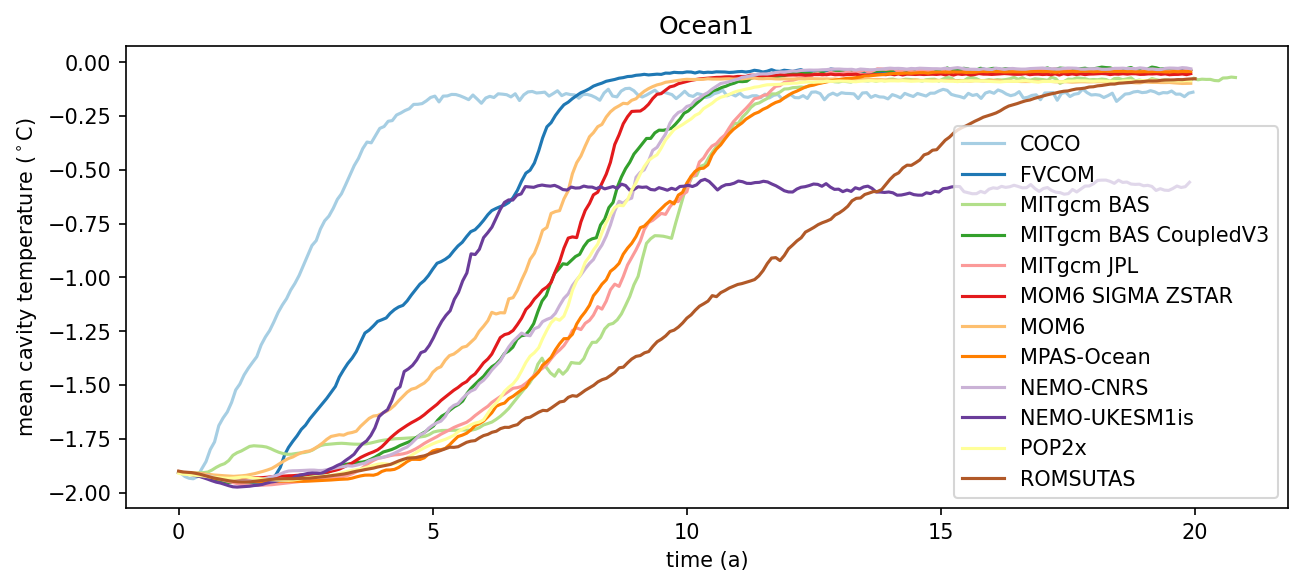

In [25]:
modelcolours=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
fig = plt.figure(figsize=(10,4),facecolor='w',dpi = 150)
sPerYr = 3600*24*365
for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    var = data.temperatureXZ
    # last year of time
    var['nz'] = var.nz*5+2.5 # add depth (2.5,7.5 etc)
    var['nx'] = var.nx*2+321
    # mr<1e36 is to get rid of NaNs.
    c = (var.where(var <1e36)).isel(nx = np.arange(161)).mean(['nx','nz'])
    print(labels[i])
    time = data.time
    
    plt.plot(time.values/sPerYr,c.values,
             color = modelcolours[i], label = labels[i])
plt.xlabel('time (a)')
plt.ylabel('mean cavity temperature ($^\circ$C)')
plt.title('Ocean1')
plt.legend()

COCO
FVCOM
MITgcm BAS
MITgcm BAS CoupledV3
MITgcm JPL
MOM6 SIGMA ZSTAR
MOM6
MPAS-Ocean
NEMO-CNRS
NEMO-UKESM1is
POP2x
ROMSUTAS


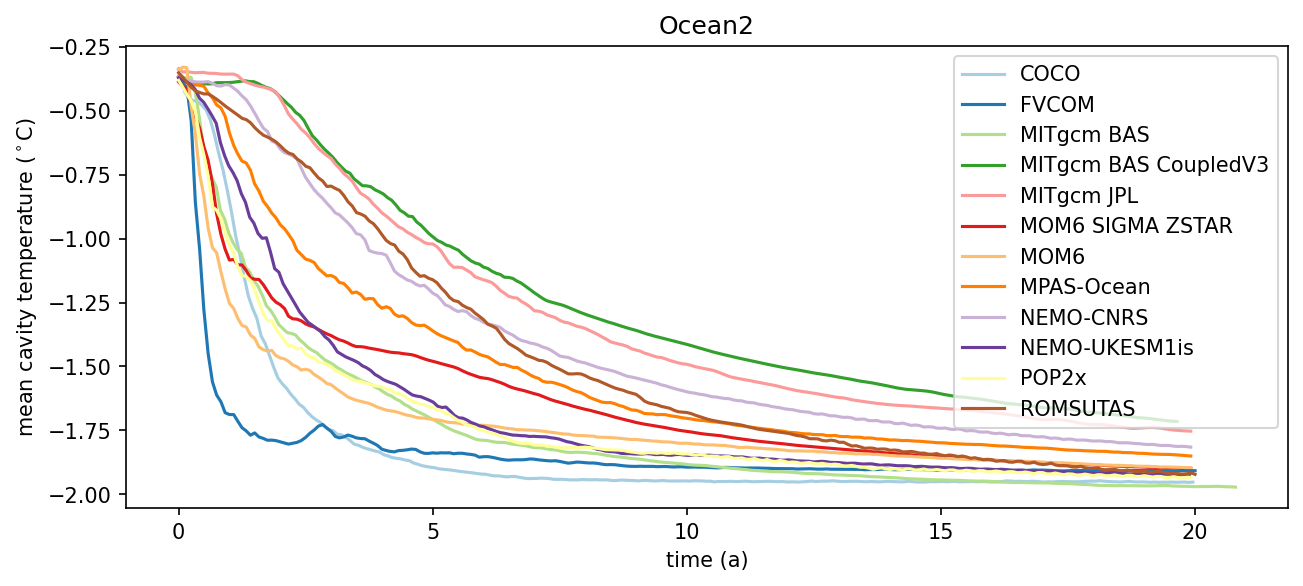

In [45]:
modelcolours=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

expt = Ocean2_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
fig = plt.figure(figsize=(10,4),facecolor='w',dpi = 150)
sPerYr = 3600*24*365
for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    var = data.temperatureXZ
    # last year of time
    var['nz'] = var.nz*5+2.5 # add depth (2.5,7.5 etc)
    var['nx'] = var.nx*2+321
    # mr<1e36 is to get rid of NaNs.
    c = (var.where(var <1e36)).isel(nx = np.arange(161)).mean(['nx','nz'])
    print(labels[i])
    time = data.time
    
    plt.plot(time.values/sPerYr,c.values,
             color = modelcolours[i], label = labels[i])
plt.xlabel('time (a)')
plt.ylabel('mean cavity temperature ($^\circ$C)')
plt.title('Ocean2')
plt.legend()

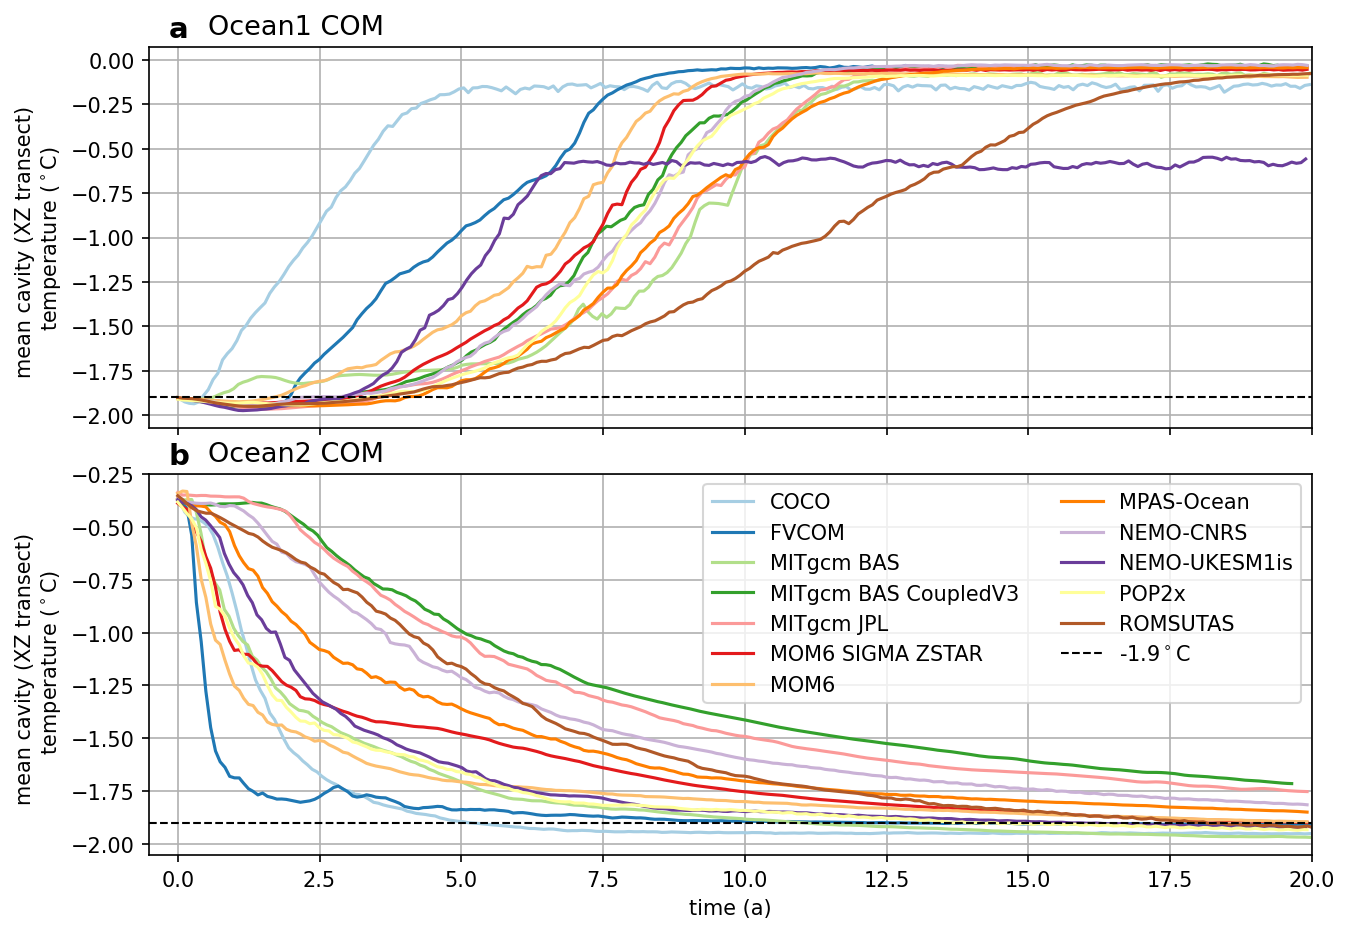

In [64]:
modelcolours=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)

ax = plt.subplot(2,1,1)
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
sPerYr = 3600*24*365
for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    var = data.temperatureXZ
    # last year of time
    var['nz'] = var.nz*5+2.5 # add depth (2.5,7.5 etc)
    var['nx'] = var.nx*2+321
    # mr<1e36 is to get rid of NaNs.
    c = (var.where(var <1e36)).isel(nx = np.arange(161)).mean(['nx','nz'])
    #print(labels[i])
    time = data.time
    
    plt.plot(time.values/sPerYr,c.values,
             color = modelcolours[i], label = labels[i])
#plt.xlabel('time (a)')
plt.xlim(-0.5,20)

plt.ylabel('mean cavity (XZ transect) \ntemperature ($^\circ$C)')
plt.title('Ocean1 COM',fontsize=13,ha='left', x=0.05)
#plt.legend()

plt.text(0.025,1.045,'a',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax.transAxes, fontsize = 14)
#hide x labels
ax.set_xticklabels('')
ax.grid()
plt.hlines([-1.9],-0.5,20,color = 'k', linestyle = '--',linewidth = 1)


#Do ocean2
ax = plt.subplot(2,1,2)
expt = Ocean2_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
sPerYr = 3600*24*365
for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    var = data.temperatureXZ
    # last year of time
    var['nz'] = var.nz*5+2.5 # add depth (2.5,7.5 etc)
    var['nx'] = var.nx*2+321
    # mr<1e36 is to get rid of NaNs.
    c = (var.where(var <1e36)).isel(nx = np.arange(161)).mean(['nx','nz'])
    #print(labels[i])
    time = data.time
    
    plt.plot(time.values/sPerYr,c.values,
             color = modelcolours[i], label = labels[i])
plt.xlabel('time (a)')
plt.xlim(-0.5,20)

plt.ylabel('mean cavity (XZ transect) \n temperature ($^\circ$C)')
plt.title('Ocean2 COM',fontsize=13,ha='left', x=0.05)
ax.grid()

plt.text(0.025,1.045,'b',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax.transAxes, fontsize = 14)
plt.hlines([-1.9],-0.5,20,color = 'k', linestyle = '--',linewidth = 1,label = '-1.9$^\circ$C')
plt.legend(ncol = 2)

fig.align_ylabels()
fig.subplots_adjust(hspace = 0.12)

Clearly Ocean2 COM not at steady state.

### a little tangent on heat fluxes


Heat flux due to melting is
$\rho_{fw} m L$

Volume of ice shelf cavity can be estimated from ice draft and bathymetry files:

Then we should expect $\int dV \frac{d}{dt}\left(\rho_0 c_p \Delta T\right) = \rho_{fw} m L$

Or approximately,

$V_{cavity} \rho_0 c_p \times \frac{d}{dt}\left(\Delta T_{cavity}\right) = \rho_{fw} m L$

(But this ignores strong effect of heat transport from boundary forcing.....)

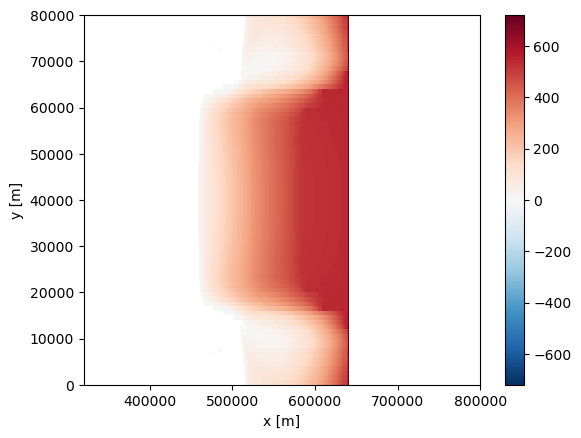

volume is 3814224054744.4653 m^3


In [39]:
Ocean1_input = xr.open_dataset(baserepo + 'Ocean1_input_geom_v1.01.nc')
thick_cavity = (Ocean1_input.lowerSurface - Ocean1_input.bedrockTopography).where(Ocean1_input.x<641e3).where(Ocean1_input.x>451e3)
thick_cavity = thick_cavity.where(thick_cavity != 0)
thick_cavity.plot()
plt.show()
volume = thick_cavity.sum().values*1e3*1e3 #m^3
print('volume is', volume, 'm^3')

COCO
FVCOM
MITgcm BAS
MITgcm BAS CoupledV3
MITgcm JPL
MOM6 SIGMA ZSTAR
MOM6
MPAS-Ocean
NEMO-CNRS
NEMO-UKESM1is
POP2x
ROMSUTAS


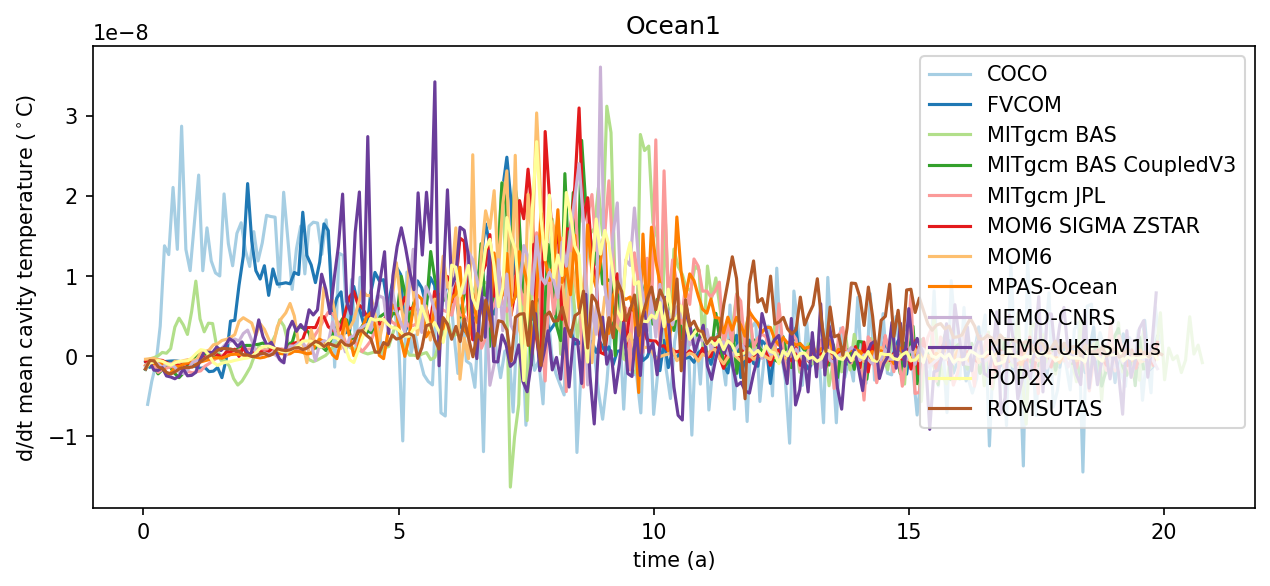

In [44]:
modelcolours=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
fig = plt.figure(figsize=(10,4),facecolor='w',dpi = 150)
sPerYr = 3600*24*365
for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    var = data.temperatureXZ
    # last year of time
    var['nz'] = var.nz*5+2.5 # add depth (2.5,7.5 etc)
    var['nx'] = var.nx*2+321
    # mr<1e36 is to get rid of NaNs.
    c = (var.where(var <1e36)).isel(nx = np.arange(161)).mean(['nx','nz'])
    print(labels[i])
    time = data.time
    c_grad = np.diff(c)/np.diff(time)
    time_half = 0.5*(time + np.roll(time,1))[1:]
    plt.plot(time_half.values/sPerYr,c_grad,
             color = modelcolours[i], label = labels[i])
plt.xlabel('time (a)')
plt.ylabel('d/dt mean cavity temperature ($^\circ$C)')
plt.title('Ocean1')
plt.legend()

clearly this doesn't match melting profile, because the sponge forcing drives the change in temperature, not the melting.